In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os

import warnings
warnings.filterwarnings('ignore')

In [68]:
fold = 0
path = 'models_DART_all_SEED42/'
for fname in os.listdir(path):
            if fname.startswith("HT0_fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                model.save_model(path + 'cp_{}_model.txt'.format(fold))

HT0_fold_0_iter_9759_score_0.80343.pkl


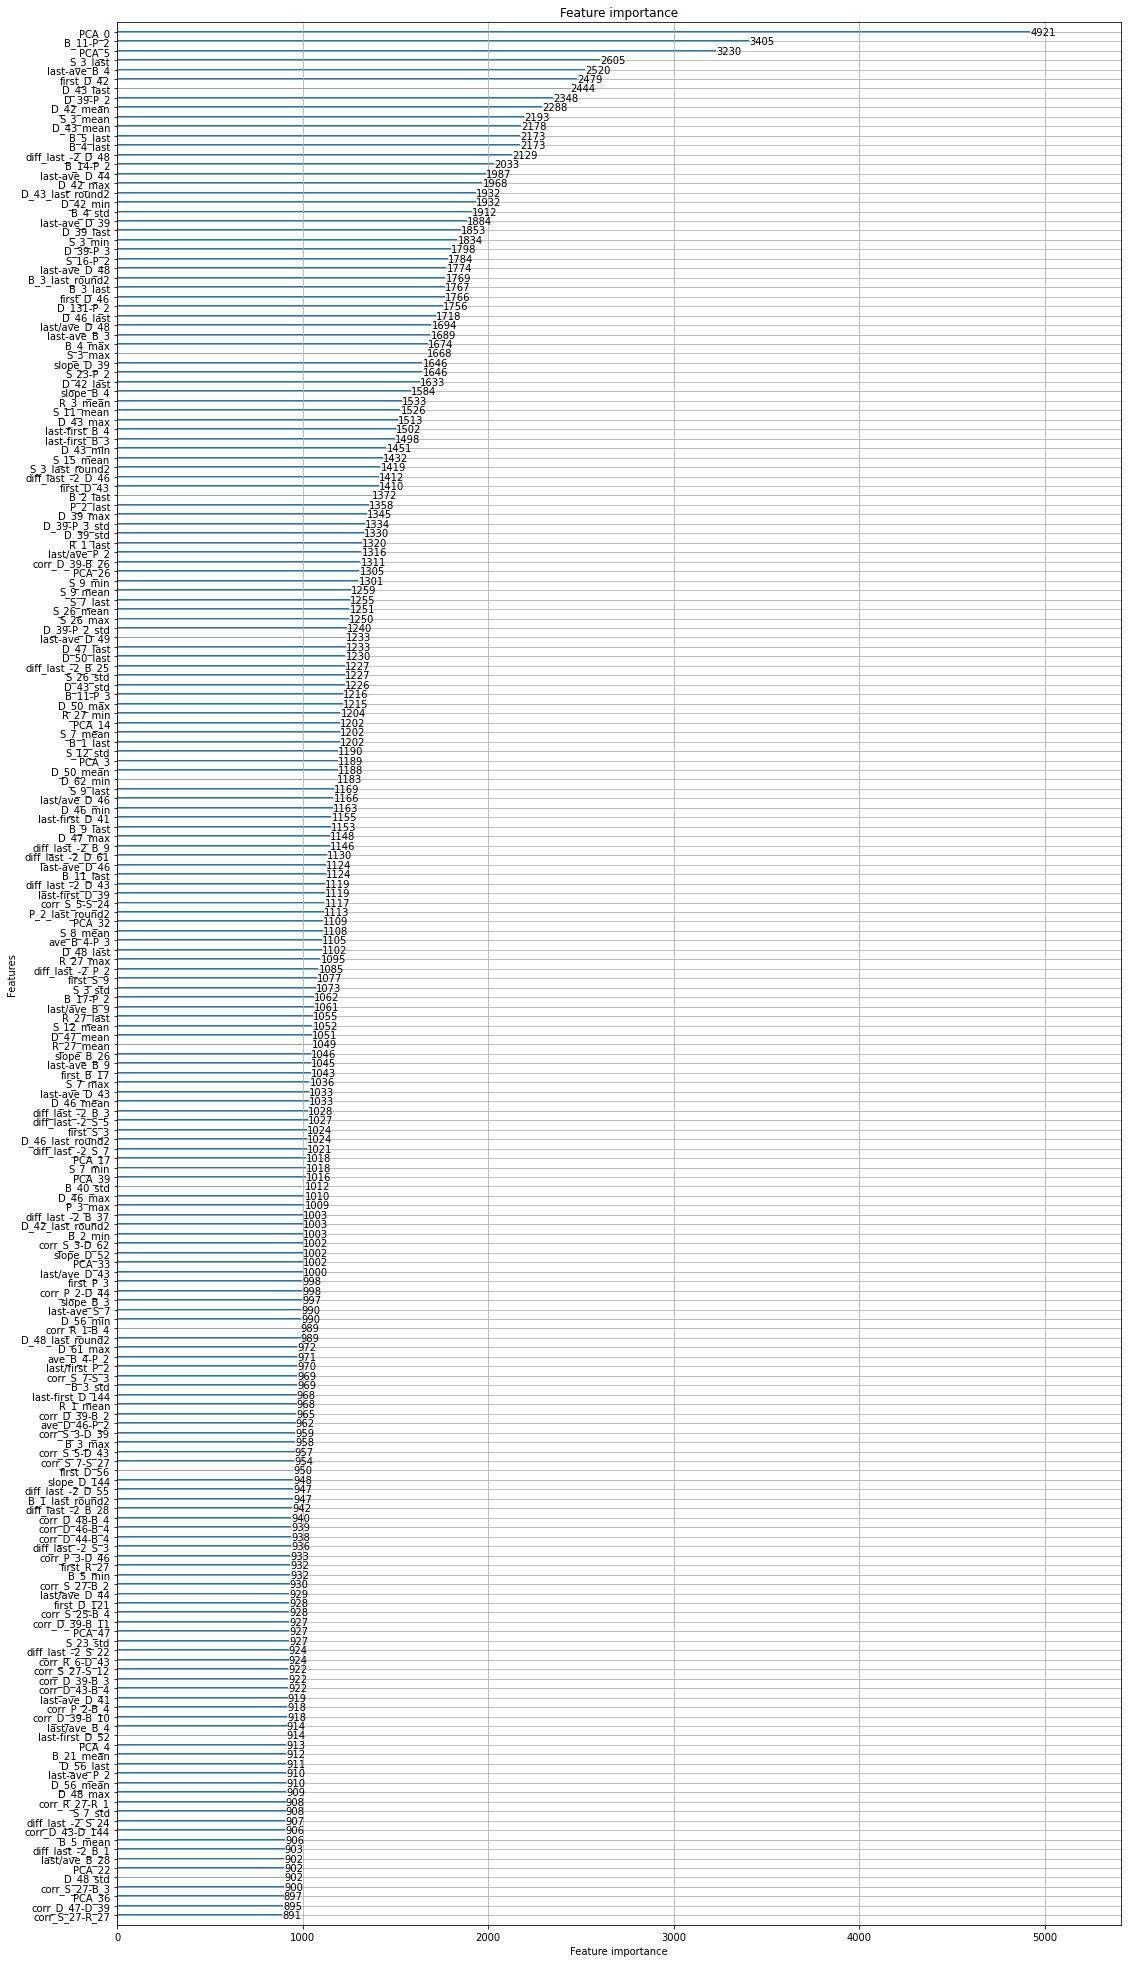

In [69]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [70]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [71]:
df.head(20)

,index,importance
0,PCA_0,4921
1,B_11-P_2,3405
2,PCA_5,3230
3,S_3_last,2605
4,last-ave_B_4,2520
5,first_D_42,2479
6,D_43_last,2444
7,D_39-P_2,2348
8,D_42_mean,2288
9,S_3_mean,2193


In [72]:
df[df.importance == 0].shape

(370, 2)

In [73]:
df[df['index'].str.startswith('ave_')].head(5)

,index,importance
96,ave_B_4-P_3,1105
140,ave_B_4-P_2,971
147,ave_D_46-P_2,962
260,ave_B_11-P_2,840
291,ave_S_16-P_2,819


In [74]:
df[df['index'].str.startswith('cat_')].head(5)

,index,importance
1270,cat_-2_D_66,286
1324,cat_-2_D_117,240
1410,cat_-2_D_64,181
1438,cat_first_D_117,163
1512,cat_-2_D_114,127


In [75]:
df[df['index'].str.startswith('NA_')].head(5)

,index,importance
1369,NA_D_77,204
1440,NA_S_9,161
1463,NA_D_50,149
1478,NA_D_43,144
1528,NA_S_27,121


In [76]:
df[df['index'].str.startswith('diff_last_')].head(5)

,index,importance
13,diff_last_-2_D_48,2129
47,diff_last_-2_D_46,1412
67,diff_last_-2_B_25,1227
86,diff_last_-2_B_9,1146
87,diff_last_-2_D_61,1130


In [77]:
df[df['index'].str.startswith('date_')].head(5)

,index,importance
456,date_day_mean,711
770,date_weekday_mean,582
959,date_day_last,502
1185,date_day_first,369
1348,date_day_min,221


In [78]:
df[df['index'].str.startswith('last/')].head(5)

,index,importance
31,last/ave_D_48,1694
55,last/ave_P_2,1316
81,last/ave_D_46,1166
103,last/ave_B_9,1061
131,last/ave_D_43,1000


In [79]:
df[df['index'].str.startswith('slope_')].head(5)

,index,importance
35,slope_D_39,1646
38,slope_B_4,1584
108,slope_B_26,1046
130,slope_D_52,1002
134,slope_B_3,997


In [80]:
df[df['index'].str.startswith('PCA_')].head()

,index,importance
0,PCA_0,4921
2,PCA_5,3230
57,PCA_26,1305
73,PCA_14,1202
77,PCA_3,1189


In [81]:
df[df['index'].str.startswith('corr_')].head()

,index,importance
56,corr_D_39-B_26,1311
92,corr_S_5-S_24,1117
129,corr_S_3-D_62,1002
133,corr_P_2-D_44,998
137,corr_R_1-B_4,989


In [82]:
df[df['index'].str.startswith('pca')]

,index,importance
495,pca_s1,696
500,pca_s2,694


In [ ]:
score = pd.read_csv('Data/corr_importance.csv')

In [ ]:
score.sort_values(by='score_first', ascending=False, inplace=True)

In [ ]:
top_corr = score['first'].unique()[:90]
top_corr

In [ ]:
for i in range(0,90):
    print(top_corr[i], end=', ')
    score_first = score[score['first'] == top_corr[i]].sort_values(by='corr', ascending=False)
    high_corr_list = score_first[score_first['corr'] > 0.4]['name'].to_list()
    print(set(top_corr).intersection(set(high_corr_list)))

In [ ]:
len(['corr_D_39-B_26', 'corr_D_48-B_4', 'corr_P_2-D_44',
       'corr_D_47-B_4', 'corr_D_47-D_39', 'corr_P_2-B_4',
       'corr_D_39-B_10', 'corr_D_44-B_4', 'corr_D_39-B_2',
       'corr_D_46-B_4', 'corr_D_48-B_3',
       'corr_D_48-B_9', 'corr_S_5-S_24', 'corr_S_7-S_3',
       'corr_D_43-D_144', 'corr_D_48-D_39',
       'corr_P_3-D_46', 'corr_S_5-D_43', 'corr_R_1-B_4',
       'corr_P_3-D_47', 'corr_D_39-B_3', 'corr_R_6-D_39', 'corr_S_27-B_2',
       'corr_S_23-D_43', 'corr_R_6-D_69', 'corr_P_2-D_48',
       'corr_S_25-B_4', 'corr_D_43-B_4', 'corr_R_27-D_69',
       'corr_S_7-S_27', 'corr_D_39-B_11', 'corr_S_3-D_39',
       'corr_S_12-B_4', 'corr_D_39-B_15',
       'corr_R_27-B_26', 'corr_S_23-D_39', 'corr_R_27-R_1',
       'corr_R_1-D_39', 'corr_S_19-D_39', 'corr_S_27-B_3',
       'corr_S_16-D_39', 'corr_R_27-B_5', 
       'corr_S_3-D_62', 'corr_D_71-D_62', 'corr_R_27-D_39',
       'corr_D_48-D_43', 'corr_D_61-B_36',
       'corr_S_25-D_39', 'corr_R_6-D_43', 'corr_S_27-R_27',
       'corr_S_27-S_12', 'corr_S_27-D_39', 'corr_D_46-B_3',
       'corr_D_62-D_47', 'corr_B_4-B_3', 'corr_R_1-D_48',
       'corr_S_16-D_46', 'corr_D_61-D_48', 'corr_P_2-D_39',
       'corr_R_27-B_2', 'corr_D_52-D_39', 'corr_S_26-D_62',
       'corr_S_23-R_27', 'corr_D_69-B_24',
       'corr_R_27-D_62', 'corr_S_19-R_27',
       'corr_R_27-B_21', 'corr_D_52-B_4', 'corr_B_4-B_15',
       'corr_D_47-B_3', 'corr_D_43-B_3', 'corr_R_27-D_71',
       'corr_D_62-D_144', 'corr_D_39-B_5', 'corr_D_48-D_44',
       'corr_S_26-D_43', 'corr_S_5-D_48', 'corr_S_26-D_39',
       'corr_P_2-D_61', 'corr_S_27-S_22'])

In [2]:
p1 = pd.read_csv('models_DART_all_56corr_pcaslope_lag_SEED42/p_HT0123.csv', index_col='customer_ID')
p2 = pd.read_csv('Output/test_lgbm_baseline_5fold_seed_blend.csv', index_col='customer_ID')

In [3]:
ensemble = p1['prediction'] * 0.50 + p2['prediction'] * 0.50

In [4]:
ensemble.to_csv('Output/ensemble_HT0123_p0_0.5.csv', header=['prediction'])